# Pandas 



In [1]:
import pandas as pd
import datetime
import numpy as np

## Primi passi in pandas 
Per capire come usare pandas incominciamo a vedere come sia possibile usarlo per effettuare delle analisi su ad esempio dati finanziari, useremo un dataset che ho scaricato da yahoo finance per vedere le sue funzionalità.

In [2]:
#creiamo un dataframe dal file csv
nikkei = pd.read_csv("../data/Nikkei.csv", parse_dates = ['Date'])

Da questo momento è stato creato una variabile oggetto di tipo pandas dataframe, per avere un'idea di come essa sia composta possiamo mostrare il suo contenuto.

In [3]:
nikkei

Date          Open          High           Low         Close  \
0    2010-01-04  10609.339844  10694.490234  10608.139648  10654.790039   
1    2010-01-05  10719.440430  10791.040039  10655.570313  10681.830078   
2    2010-01-06  10709.549805  10768.610352  10661.169922  10731.450195   
3    2010-01-07  10742.750000  10774.000000  10636.669922  10681.660156   
4    2010-01-08  10743.299805  10816.450195  10677.559570  10798.320313   
...         ...           ...           ...           ...           ...   
2713 2021-01-06  27102.849609  27196.400391  27002.179688  27055.939453   
2714 2021-01-07  27340.460938  27624.730469  27340.460938  27490.130859   
2715 2021-01-08  27720.140625  28139.029297  27667.750000  28139.029297   
2716 2021-01-12  28004.369141  28287.369141  27899.449219  28164.339844   
2717 2021-01-13  28140.099609  28503.429688  28133.589844  28456.589844   

         Adj Close    Volume  
0     10654.790039  104400.0  
1     10681.830078  166200.0  
2     10731.450195  181800.0  
3     10681.660156  182600.0  
4     10798.320313  211800.0  
...            ...       ...  
2713  27055.939453   72700.0  
2714  27490.130859   98900.0  
2715  28139.029297   84900.0  
2716  28164.339844   78800.0  
2717  28456.589844       0.0  

[2718 rows x 7 columns]

Per mostrare solo i primi elementi è anche possibile usare la funzione `.head()` per dare una visione più ristretta.

In [4]:
nikkei.head()

Date          Open          High           Low         Close  \
0 2010-01-04  10609.339844  10694.490234  10608.139648  10654.790039   
1 2010-01-05  10719.440430  10791.040039  10655.570313  10681.830078   
2 2010-01-06  10709.549805  10768.610352  10661.169922  10731.450195   
3 2010-01-07  10742.750000  10774.000000  10636.669922  10681.660156   
4 2010-01-08  10743.299805  10816.450195  10677.559570  10798.320313   

      Adj Close    Volume  
0  10654.790039  104400.0  
1  10681.830078  166200.0  
2  10731.450195  181800.0  
3  10681.660156  182600.0  
4  10798.320313  211800.0

Per avere informazione sui tipi di dati usati per memorizzare le variabili o informazioni generali è possibile usare la funzione info.

In [5]:
nikkei.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2718 entries, 0 to 2717
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       2718 non-null   datetime64[ns]
 1   Open       2698 non-null   float64       
 2   High       2698 non-null   float64       
 3   Low        2698 non-null   float64       
 4   Close      2698 non-null   float64       
 5   Adj Close  2698 non-null   float64       
 6   Volume     2698 non-null   float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 148.8 KB


Come è possibile notare pandas ci dice già **quanti sono i valori nulli o non null** e specifica il  formato in cui sono salvati i dati, notate bene che **i formati usati sono uguali a quelli in numpy**, ciò non deve stupire poiché è basata su di esso la libreria, inoltre ci fornisce informazioni sulla **memoria occupata** per salvare il dataframe.

<div class="alert alert-block alert-warning">
    I valori nulli sono definiti come tutti quei valori che non sono stati definiti oppure che non sono riconosciuti dalla macchina per uno o più motivi.
</div>

## Operazioni sul DataFrame
Sul dataframe è possibile applicare numerose operazioni tra cui selezionare specifici elementi, calcolare le medie, selezionare elementi e fare molto altro.

In [8]:
#select only the column Open
nikkei[["Open", "Close"]].head()

Open         Close
0  10609.339844  10654.790039
1  10719.440430  10681.830078
2  10709.549805  10731.450195
3  10742.750000  10681.660156
4  10743.299805  10798.320313

In [9]:
#Select only max e min value of AdjClose and calculate mean
print("Prezzo Massimo Adj close", nikkei["Adj Close"].max(), "USD")
print("Prezzo Minimo Adj close", nikkei["Adj Close"].min(), "USD")
print("Media di tutti i valori Adj Close", nikkei["Adj Close"].mean(), "USD")
#possibile selezionare anche la riga contenente il valore
print("Tutti i valori il giorno in cui Adj Close era maggiore o uguale al min storico:\n")
display(nikkei[nikkei["Adj Close"] >= nikkei["Adj Close"].min()])

Prezzo Massimo Adj close 28456.589844 USD
Prezzo Minimo Adj close 8160.009766 USD
Media di tutti i valori Adj Close 16437.871096161947 USD
Tutti i valori il giorno in cui Adj Close era maggiore o uguale al min storico:



Date          Open          High           Low         Close  \
0    2010-01-04  10609.339844  10694.490234  10608.139648  10654.790039   
1    2010-01-05  10719.440430  10791.040039  10655.570313  10681.830078   
2    2010-01-06  10709.549805  10768.610352  10661.169922  10731.450195   
3    2010-01-07  10742.750000  10774.000000  10636.669922  10681.660156   
4    2010-01-08  10743.299805  10816.450195  10677.559570  10798.320313   
...         ...           ...           ...           ...           ...   
2713 2021-01-06  27102.849609  27196.400391  27002.179688  27055.939453   
2714 2021-01-07  27340.460938  27624.730469  27340.460938  27490.130859   
2715 2021-01-08  27720.140625  28139.029297  27667.750000  28139.029297   
2716 2021-01-12  28004.369141  28287.369141  27899.449219  28164.339844   
2717 2021-01-13  28140.099609  28503.429688  28133.589844  28456.589844   

         Adj Close    Volume  
0     10654.790039  104400.0  
1     10681.830078  166200.0  
2     10731.450195  181800.0  
3     10681.660156  182600.0  
4     10798.320313  211800.0  
...            ...       ...  
2713  27055.939453   72700.0  
2714  27490.130859   98900.0  
2715  28139.029297   84900.0  
2716  28164.339844   78800.0  
2717  28456.589844       0.0  

[2698 rows x 7 columns]

In [10]:
#possibile selezionare anche gli elementi come in numpy usando loc o iloc
#prime mille righe e 6 colonne
nikkei.iloc[0:1000, 1:6]

Open          High           Low         Close     Adj Close
0    10609.339844  10694.490234  10608.139648  10654.790039  10654.790039
1    10719.440430  10791.040039  10655.570313  10681.830078  10681.830078
2    10709.549805  10768.610352  10661.169922  10731.450195  10731.450195
3    10742.750000  10774.000000  10636.669922  10681.660156  10681.660156
4    10743.299805  10816.450195  10677.559570  10798.320313  10798.320313
..            ...           ...           ...           ...           ...
995  15091.450195  15109.679688  14933.549805  15005.730469  15005.730469
996  15038.639648  15088.120117  14952.830078  14980.160156  14980.160156
997  15164.339844  15383.910156  15159.919922  15383.910156  15383.910156
998  15112.700195  15112.700195  14853.830078  15007.059570  15007.059570
999  15132.230469  15143.879883  14764.570313  14914.530273  14914.530273

[1000 rows x 5 columns]

In [11]:
#altro modo più intuitivo
nikkei[["Open", "High", "Low", "Close", "Adj Close"]]

Open          High           Low         Close     Adj Close
0     10609.339844  10694.490234  10608.139648  10654.790039  10654.790039
1     10719.440430  10791.040039  10655.570313  10681.830078  10681.830078
2     10709.549805  10768.610352  10661.169922  10731.450195  10731.450195
3     10742.750000  10774.000000  10636.669922  10681.660156  10681.660156
4     10743.299805  10816.450195  10677.559570  10798.320313  10798.320313
...            ...           ...           ...           ...           ...
2713  27102.849609  27196.400391  27002.179688  27055.939453  27055.939453
2714  27340.460938  27624.730469  27340.460938  27490.130859  27490.130859
2715  27720.140625  28139.029297  27667.750000  28139.029297  28139.029297
2716  28004.369141  28287.369141  27899.449219  28164.339844  28164.339844
2717  28140.099609  28503.429688  28133.589844  28456.589844  28456.589844

[2718 rows x 5 columns]

Sono presenti numerose altre operazioni che sono possibili da fare con pandas, alcuni librerie di backtesting per trading o investimento sono basate su pandas per fare un esempio, qualora aveste dubbi o volete sapere quali altri funzionalità abbia fate un salto sulla __[documentazione](https://pandas.pydata.org/docs/user_guide/index.html)__.

## Plot pandas with plotly

Per rappresentare il dataframe in genere è possibile usare la libreria __[matplotlib](https://matplotlib.org/)__, ma poiché si tratta di dati finanziari preferisco mostrare la libreria già accennata __[plotly](https://plotly.com/python/)__, vediamo alcuni esempi.

<div class="alert alert-block alert-warning">
    Per poter usare plotly su jupyter lab è necessario usare i seguenti comandi in anaconda:
    <li> conda install nodejs</li>
    <li> conda install -c plotly plotly=4.14.3 </li>
    <li> jupyter labextension install jupyterlab-plotly@4.14.3 </li>
    Per problemi consultate la <a href="https://plotly.com/python/getting-started/"> guida </a>.
</div>

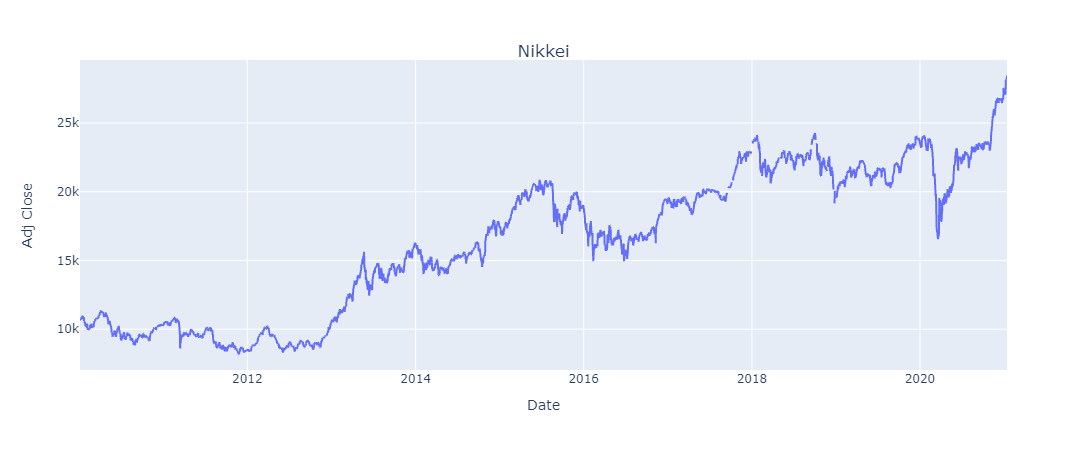

In [12]:
import plotly.express as px
import plotly.graph_objects as go

#classico grafico di una singola linea
fig = px.line(nikkei, x = "Date", y="Adj Close")
#create title and center it
fig.update_layout(
    title={
        'text': "Nikkei",
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'})
#show figure
fig.show()

Plotly però in particolare permette di poter definire altri tipi di plot in particolare in ambito finanziario come i candlesticks.

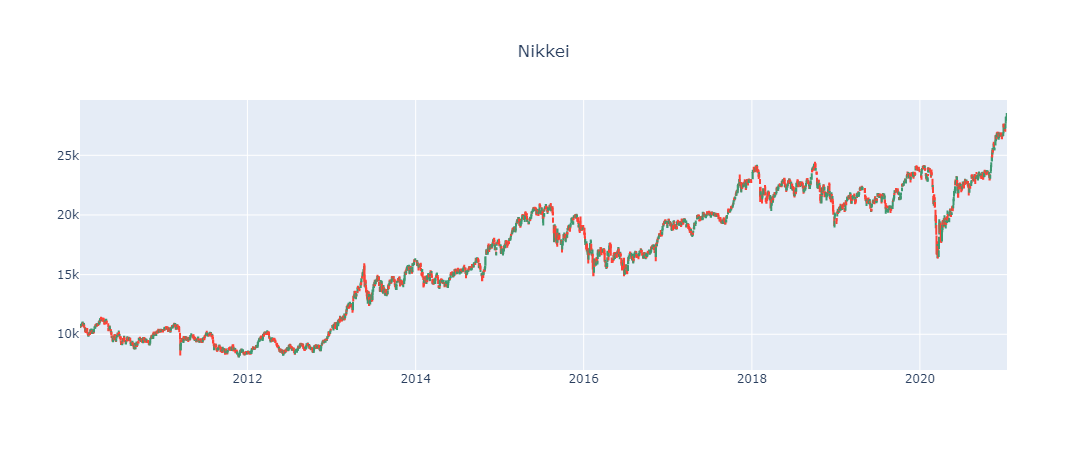

In [14]:
#create candlestick chart
fig = go.Figure(data=[go.Candlestick(x = nikkei["Date"],
                open=nikkei['Open'],
                high=nikkei['High'],
                low=nikkei['Low'],
                close=nikkei['Close'])])
#remove the rangeslider and add title centered
fig.update_layout(xaxis_rangeslider_visible=False,
                 title={'text': "Nikkei",
                        'y':0.9,
                        'x':0.5,
                        'xanchor': 'center',
                        'yanchor': 'top'})

fig.show()

## Applicare funzioni con map e filtrare il dataset
Qualora sia necessario applicare delle funzioni semplici in python o filtrare delle colonne abbiamo visto nel capitolo precedente, possiamo applicare questi metodi anche al dataset complessivamente o in parte usando `map()` nel primo caso o `filter()` nel secondo, **pandas però permette di definire in maniera più semplice usando dei metodi propri questo**, alcuni di essi li avete appena visti, ma cerchiamo di capire come funzionano.

Sessioni in cui la chiusura è stata maggiore o uguale a 15k e con volumi maggiori o uguali a 50k


Date          Open          High           Low         Close  \
823  2013-05-15  14962.339844  15108.830078  14956.379883  15096.030273   
824  2013-05-16  15146.049805  15155.719727  14879.509766  15037.240234   
825  2013-05-17  14926.419922  15157.320313  14902.299805  15138.120117   
826  2013-05-20  15260.610352  15381.740234  15245.799805  15360.809570   
827  2013-05-21  15264.790039  15388.370117  15264.419922  15381.019531   
...         ...           ...           ...           ...           ...   
2712 2021-01-05  27151.380859  27279.779297  27073.460938  27158.630859   
2713 2021-01-06  27102.849609  27196.400391  27002.179688  27055.939453   
2714 2021-01-07  27340.460938  27624.730469  27340.460938  27490.130859   
2715 2021-01-08  27720.140625  28139.029297  27667.750000  28139.029297   
2716 2021-01-12  28004.369141  28287.369141  27899.449219  28164.339844   

         Adj Close    Volume  
823   15096.030273  435000.0  
824   15037.240234  375100.0  
825   15138.120117  314500.0  
826   15360.809570  368100.0  
827   15381.019531  514100.0  
...            ...       ...  
2712  27158.630859   55000.0  
2713  27055.939453   72700.0  
2714  27490.130859   98900.0  
2715  28139.029297   84900.0  
2716  28164.339844   78800.0  

[1604 rows x 7 columns]

applichiamo un log in base naturale e a tutte le colonne


Open       High        Low      Close  Adj Close
0      9.269490   9.277484   9.269377   9.273765   9.273765
1      9.279814   9.286471   9.273838   9.276299   9.276299
2      9.278891   9.284391   9.274363   9.280934   9.280934
3      9.281986   9.284891   9.272063   9.276284   9.276284
4      9.282038   9.288823   9.275900   9.287146   9.287146
...         ...        ...        ...        ...        ...
2713  10.207394  10.210840  10.203673  10.205662  10.205662
2714  10.216123  10.226467  10.216123  10.221582  10.221582
2715  10.229915  10.244913  10.228023  10.244913  10.244913
2716  10.240116  10.250171  10.236362  10.245812  10.245812
2717  10.244951  10.257780  10.244720  10.256135  10.256135

[2718 rows x 5 columns]

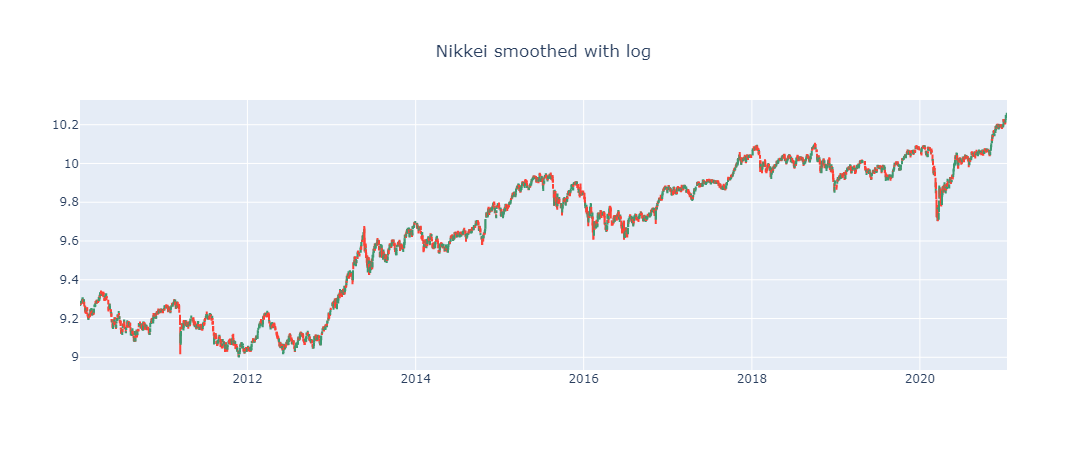

In [15]:
#filtrare un dataset per uno specifico valore delle colonne
print("Sessioni in cui la chiusura è stata maggiore o uguale a 15k e con volumi maggiori o uguali a 50k")
display(nikkei[(nikkei["Close"] >= 15000) & (nikkei["Volume"] >= 50000)])

#applicare una funzione su di esso
print("applichiamo un log in base naturale e a tutte le colonne")
nikkei_log = nikkei.drop(columns= ["Date","Volume"]).applymap(lambda x : np.log(x))
display(nikkei_log)

#mettiamo le date
nikkei_log.insert(loc = 0, column = "Date", value = nikkei.Date)

#create candlestick chart
fig = go.Figure(data=[go.Candlestick(x = nikkei_log["Date"],
                open=nikkei_log['Open'],
                high=nikkei_log['High'],
                low=nikkei_log['Low'],
                close=nikkei_log['Close'])])
#remove the rangeslider and add title centered
fig.update_layout(xaxis_rangeslider_visible=False,
                 title={'text': "Nikkei smoothed with log",
                        'y':0.9,
                        'x':0.5,
                        'xanchor': 'center',
                        'yanchor': 'top'})

fig.show()

L'`applymap()` richiede una funzione map, qualora vogliate usare una funzione qualsiasi usate invece __[apply()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.apply.html)__ in modo da controllare se farlo per colonne o per righe.<br>
Qualora vogliate avere più modi di filtrare e mappare potete guardare __[questo sito](https://www.listendata.com/2019/07/how-to-filter-pandas-dataframe.html)__.

Questa lezione di pandas vuole darvi sono le basi per sull'utilizzo di questa libreria, qualora voi abbiate dubbi o chiarimenti potete consultare questa recente __[guida](https://pandas.pydata.org/docs/getting_started/index.html)__ su come iniziare e come sempre consultare la __[guida completa](https://pandas.pydata.org/docs/user_guide/index.html)__.
***
COMPLIMENTI AVETE COMPLETATO LA LEZIONE SULLA LIBRERIA PANDAS!